# Agglomerative clustering with different metrics

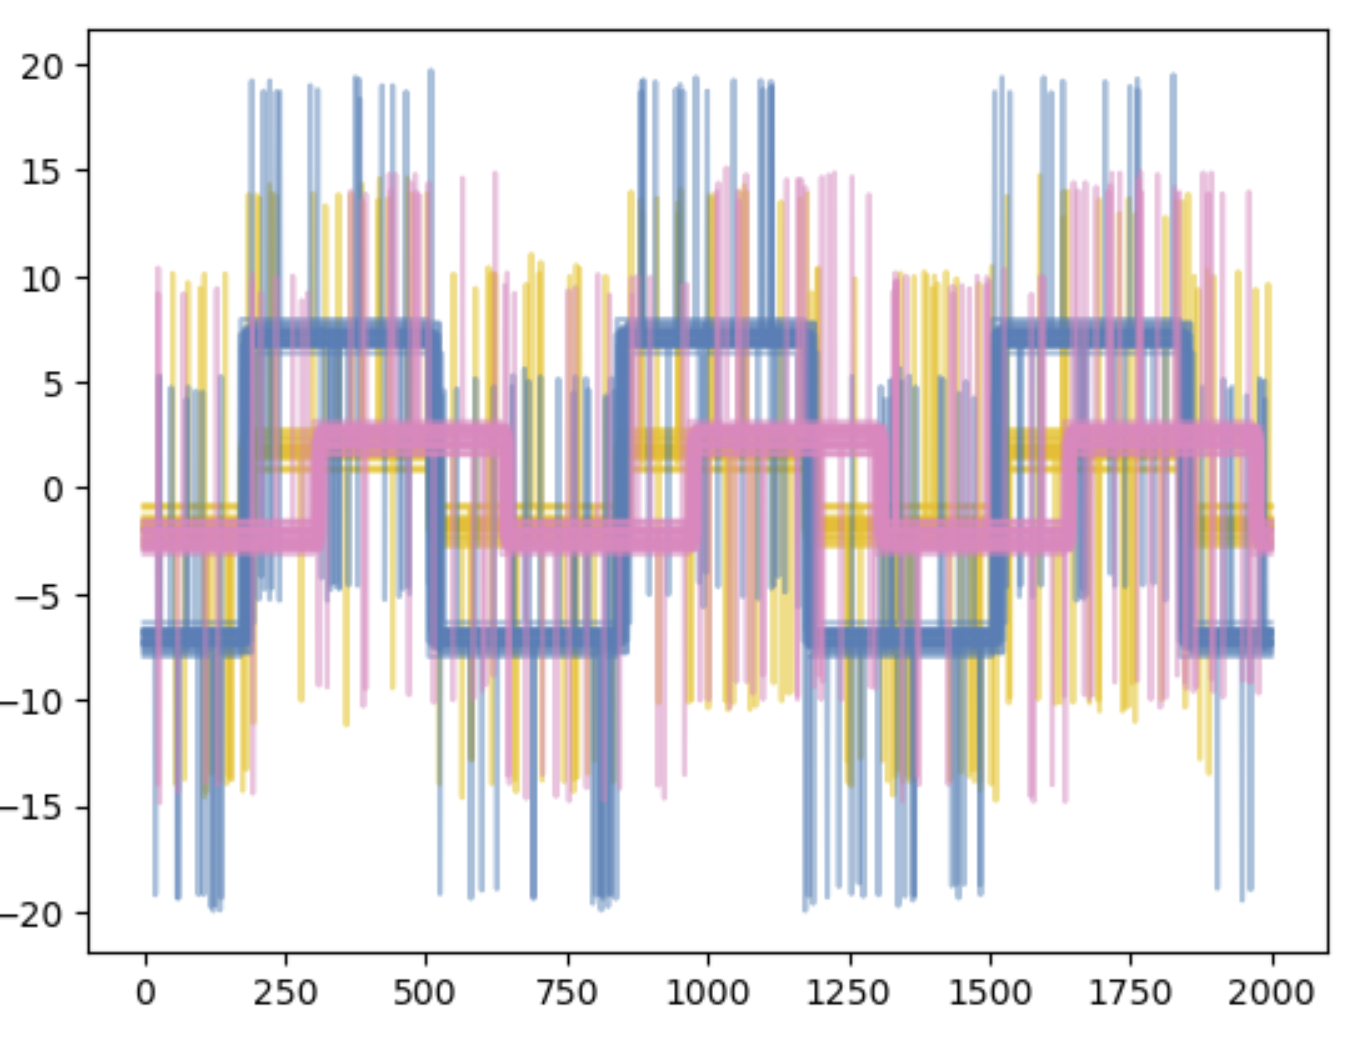


derived from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py

In [6]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))


X = list()
y = list()
for i, (phi, a) in enumerate([(0.5, 0.15), (0.5, 0.6), (0.3, 0.2)]):
    for _ in range(30):
        phase_noise = 0.01 * np.random.normal()
        amplitude_noise = 0.04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < 0.997] = 0

        X.append(
            12
            * (
                (a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise)))
                + additional_noise
            )
        )
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
XPC = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

n_clusters = 3

labels = ("Waveform 1", "Waveform 2", "Waveform 3")

colors = ["#f7bd01", "#377eb8", "#f781bf"]



[0.81845299 0.0706514  0.03222981 0.01287891]
[1229.84584833  361.33847283  244.05216215  154.27419253]


In [2]:
import pandas as pd
XPC.shape
df = pd.DataFrame(XPC)
df

,0,1,2,3
0,-43.138723,-55.188516,4.696792,14.928824
1,-50.216116,-33.904267,-30.153829,12.477473
2,-60.208884,-47.515361,-15.619536,-6.888023
3,-40.602349,-48.218534,-2.968849,-2.501236
4,-59.156595,-48.472627,-12.118236,-6.234494
...,...,...,...,...
85,-123.337566,54.145293,14.045076,1.071611
86,-124.744643,24.359045,6.151405,0.502043
87,-119.899881,25.079537,4.371837,0.354819
88,-129.314853,35.643524,9.527828,-1.135754


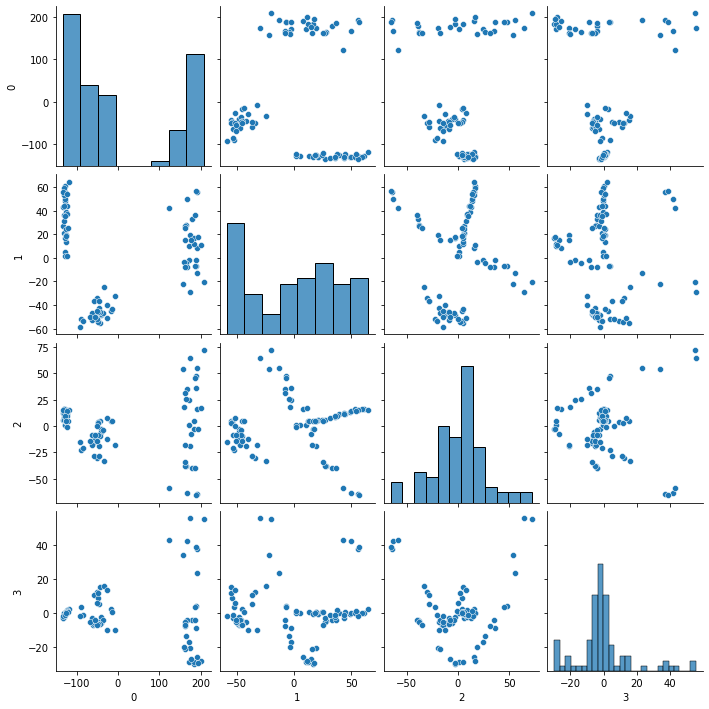

In [3]:
import seaborn as sns
sns.pairplot(df)

In [4]:
from sklearn.cluster import DBSCAN
import numpy as np
start = time.time()
clustering = DBSCAN(eps=50, min_samples=3).fit(XPC[:,[0,1]])
# clustering.labels_
XPCC = clustering.fit_predict (XPC[:,[0,1]])
print(f"elapsed time {time.time() - start}")

#

elapsed time 0.005403280258178711


Text(0.5, 1, 'PCA + DBSCAN')

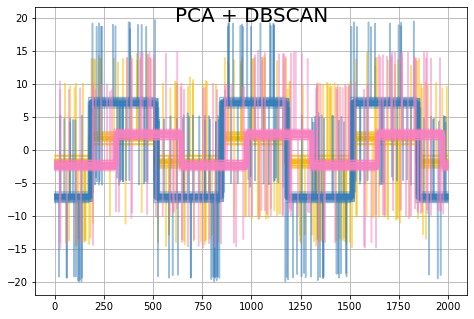

In [5]:
# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, color, n in zip(range(n_clusters), colors, labels):
    lines = plt.plot(X[y == l].T, c=color, alpha=0.5)
    lines[0].set_label(n)

plt.axis("tight")
plt.axis("on")
plt.grid()
plt.suptitle("PCA + DBSCAN", size=20, y=1)

Text(0.5, 1, 'PCA + DBSCAN')

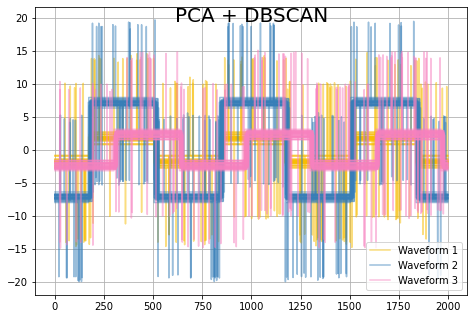

In [8]:
# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, color, n in zip(range(n_clusters), colors, labels):
    lines = plt.plot(X[y == l].T, c=color, alpha=0.5)
    lines[0].set_label(n)

plt.legend(loc="best")


plt.axis("tight")
plt.axis("on")
plt.grid()
plt.suptitle("PCA + DBSCAN", size=20, y=1)
